# Movie_data
Min, Max and Mean duration of movies over the years

### I was wondering if movies have gotten longer, or if they just feel that way.

Data is from **Chuan Sun** (https://www.kaggle.com/deepmatrix)'s entry on Kaggle: https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset  
The raw data is here: https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv

I chose the 12 most common genres from this data.

I used pandas and numpy to create Pivot Tables of the minimum, maximum and mean duration for every year, then used matplotlib.pyplot to plot. Using these libraries makes the program very simple.

## NOTE:
  During some executions, I got an error meessage saying that stdout was down.  *sys.\_\_stdout\_\_ = sys.stdout* fixes that error.

In [1]:
#import modules
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sys
sys.__stdout__ = sys.stdout    


In [2]:
# Get data from the Web

url = "https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv"
movie_data = pd.read_csv(url, encoding="Latin-1")

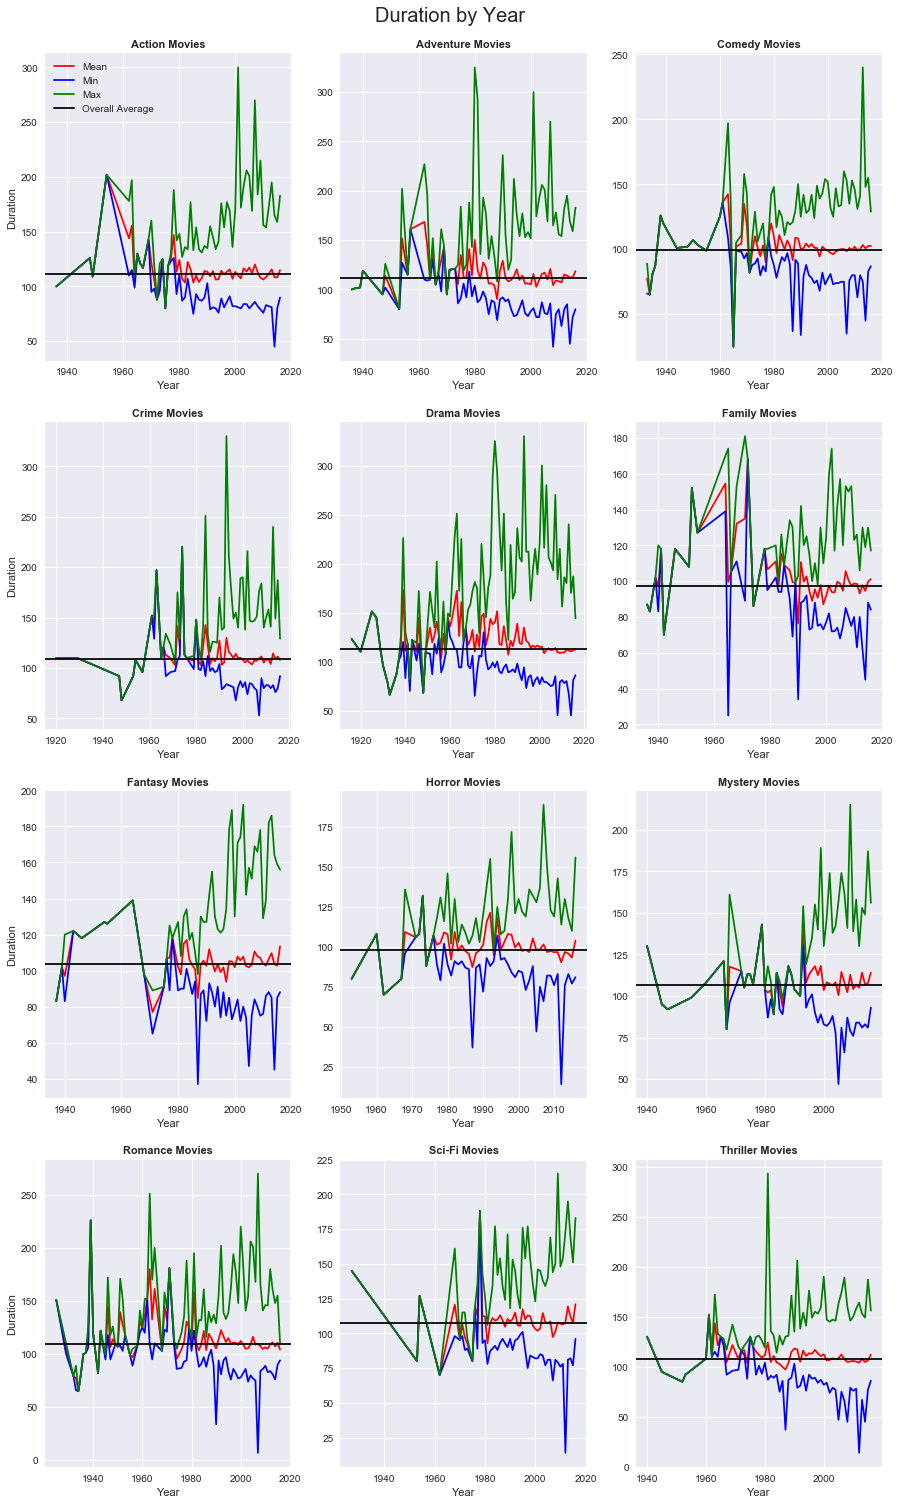

In [3]:
# Create Pivot Tables
plt.style.use('seaborn')
fig = plt.figure(figsize=(15,26))

genre_list = ["Action", "Adventure", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Horror", "Mystery", "Romance", "Sci-Fi", "Thriller"] 
plt.suptitle('Duration by Year',fontsize=20, verticalalignment="center", y=0.90)

for idx in range(12):
    genre_name = genre_list[idx]
    genre_data = movie_data[movie_data["genres"].str.contains (genre_name)]
    genre_title = genre_name + ' Movies'

    genre_mean_dur_by_year = genre_data.pivot_table(index="title_year", values="duration", aggfunc=numpy.mean)
    genre_min_dur_by_year = genre_data.pivot_table(index="title_year", values="duration", aggfunc=numpy.min)
    genre_max_dur_by_year = genre_data.pivot_table(index="title_year", values="duration", aggfunc=numpy.max)

    dur_is_null = pd.isnull(genre_data.duration)
    only_good_data = genre_data.duration[dur_is_null == False]
    genre_mean = only_good_data.mean(axis=0)

    # Display the data
    # Change the default style

    ax = fig.add_subplot(4, 3,idx+1)
    left_graph = idx % 3
    if left_graph == 0:
        ax.set_ylabel('Duration')
    ax.set_xlabel('Year')
    ax.set_title(genre_title, weight="bold", fontsize=11)
    ax.plot(genre_mean_dur_by_year, "r",label="Mean")
    ax.plot(genre_min_dur_by_year, "b", label="Min")
    ax.plot(genre_max_dur_by_year, "g", label="Max")
    ax.axhline(y=genre_mean, color='k', label="Overall Average")
    if idx == 0:
        ax.legend(loc='upper left')
    
plt.show()

# Conclusion:

Movies overall really aren''t getting longer -- the average run-time is remarkably consistant, and the max isn''t growing, either.  However, there are trends in certain genres:
    * Comedies and Mysteries are growing, but not quickly.
    * Dramas and Romances are all over the place.
    * The longest Fantasoes and Sci-Fi movies are getting much longer
    

Further exploration of the spikes could be interesting.